<a href="https://colab.research.google.com/github/EstelleSimon/ECONOMETRIE_projet/blob/main/Econometrie_projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("googledrive")
install.packages("readxl")
install.packages("ggplot2")
install.packages("reshape")
install.packages("urca")
install.packages("exuber")
install.packages("data.table")
install.packages('lmtest')
install.packages('sandwich')
install.packages("tseries")
sessionInfo()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rngtools’, ‘iterators’, ‘snow’, ‘doRNG’, ‘doSNOW’, ‘foreach’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-lib

R version 4.3.1 (2023-06-16)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] readxl_1.4.3      googledrive_2.1.1 ggplot2_3.4.4    

loaded via a namespace (and not attached):
 [1] gtable_0.3.4      jsonlite_1.8.7    dplyr_1.1.3       compiler_

Data is from the Federal Reserve official website: https://www.federalreserve.gov/releases/h15/

In [ ]:
library(googledrive)
drive_download("https://docs.google.com/spreadsheets/d/103LhoAqEeT_Ht77d_siuRMqzVGNHavz46iX-8heOxdw/edit?usp=sharing",overwrite=TRUE)


Auto-refreshing stale OAuth token.

File downloaded:

• FEDFUND <id: 103LhoAqEeT_Ht77d_siuRMqzVGNHavz46iX-8heOxdw>

Saved locally as:

• FEDFUND.xlsx



Source: https://fr.investing.com/indices/s-p-500-energy

In [ ]:
drive_download("https://docs.google.com/spreadsheets/d/1lpy5gr4A6-JG38DEBkndXgi0KhWqw9NknUmSaSrtRCY/edit?usp=sharing",overwrite = TRUE)

File downloaded:

• 'S&P 500 Energy (Sector)' <id: 1lpy5gr4A6-JG38DEBkndXgi0KhWqw9NknUmSaSrtRCY>

Saved locally as:

• S&P 500 Energy (Sector).xlsx



In [ ]:
library(readxl)
EnergySector <- read_xlsx(path = "S&P 500 Energy (Sector).xlsx", skip = 1, sheet = "ES")
colnames(EnergySector) <- c("date", "DataES")


In [ ]:
library(readxl)
FEDFUND<-read_xlsx(path = "FEDFUND.xlsx",skip=593,sheet = "FF")
colnames(FEDFUND)<-c("date","DataFF")

In [ ]:
# Calculer le logarithme népérien de la colonne "DataES" et le stocker dans une nouvelle colonne
EnergySector$log_DataES <- log(EnergySector$DataES)

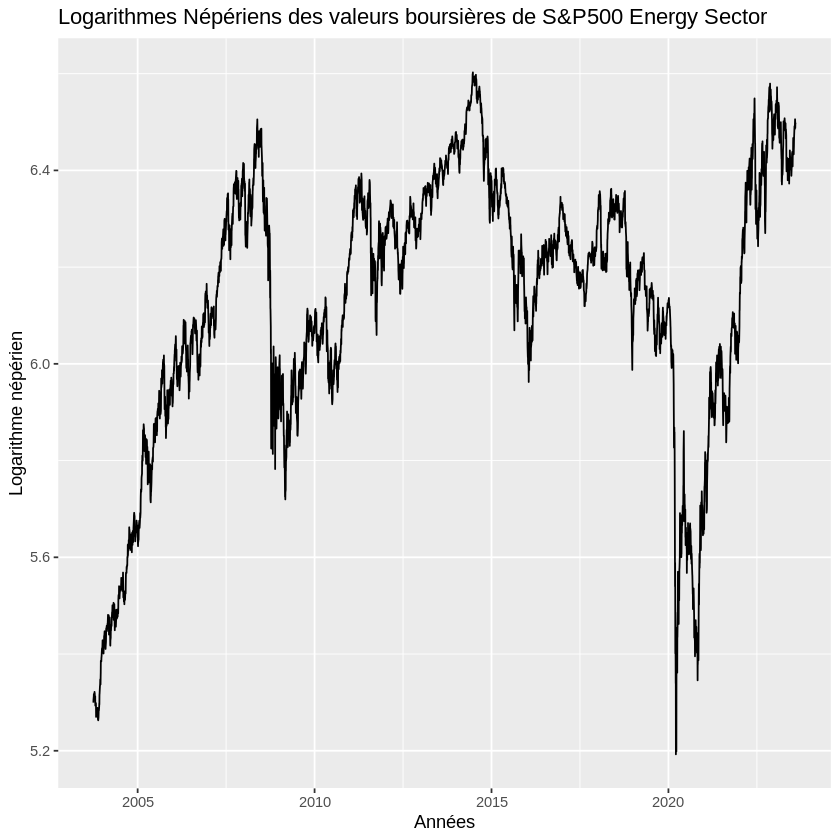

In [ ]:
library(ggplot2)
ggplot(data = EnergySector, aes(x = date, y = log_DataES)) +
  geom_line() +
  labs(x = "Années", y = "Logarithme népérien") +
  ggtitle("Logarithmes Népériens des valeurs boursières de S&P500 Energy Sector")

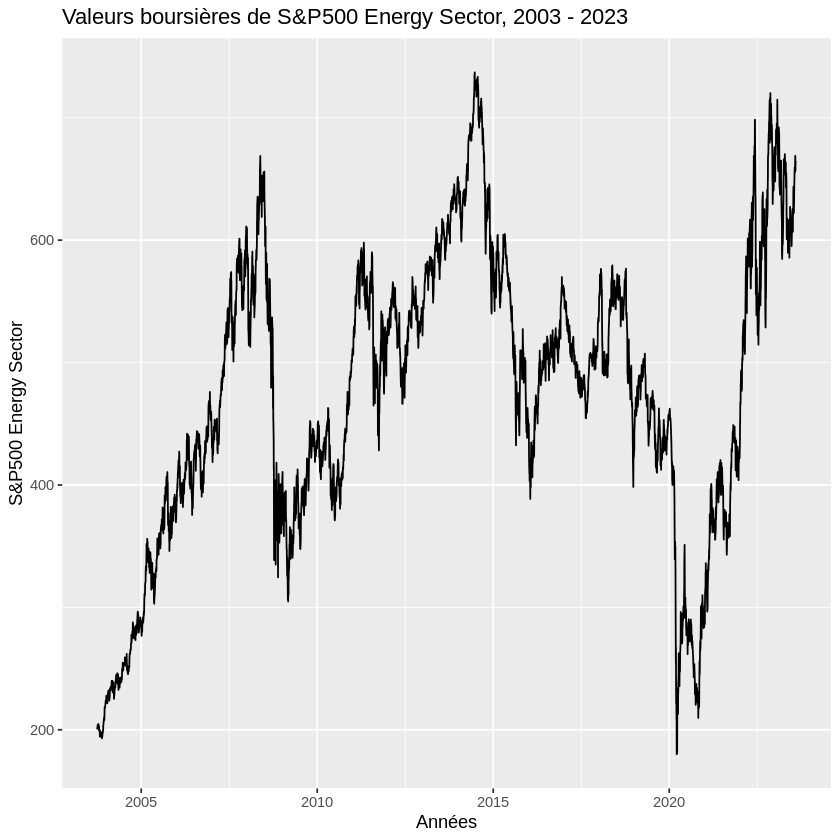

In [ ]:
library(ggplot2)
ggplot(data = EnergySector, aes(x = date, y = DataES)) +
  geom_line() +
  labs(x = "Années", y = "S&P500 Energy Sector") +
  ggtitle("Valeurs boursières de S&P500 Energy Sector, 2003 - 2023")

In [ ]:
# Calculer le logarithme népérien de la colonne "DataES" et le stocker dans une nouvelle colonne
FEDFUND$log_DataFF <- log(FEDFUND$DataFF)

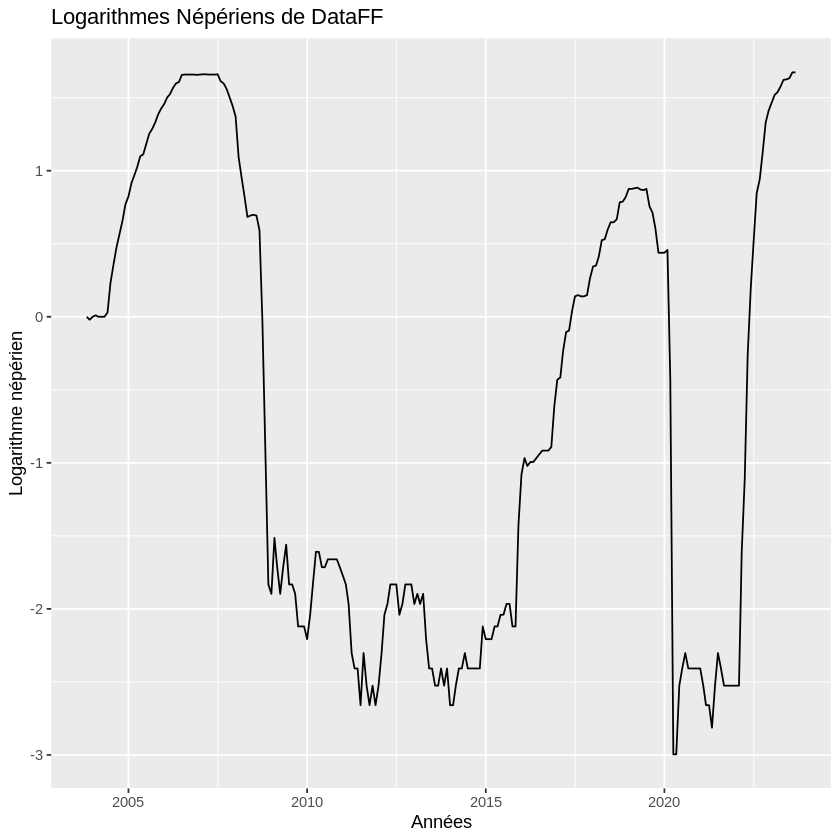

In [ ]:
library(ggplot2)
ggplot(data = FEDFUND, aes(x = date, y = log_DataFF)) +
  geom_line() +
  labs(x = "Années", y = "Logarithme népérien") +
  ggtitle("Logarithmes Népériens de DataFF")

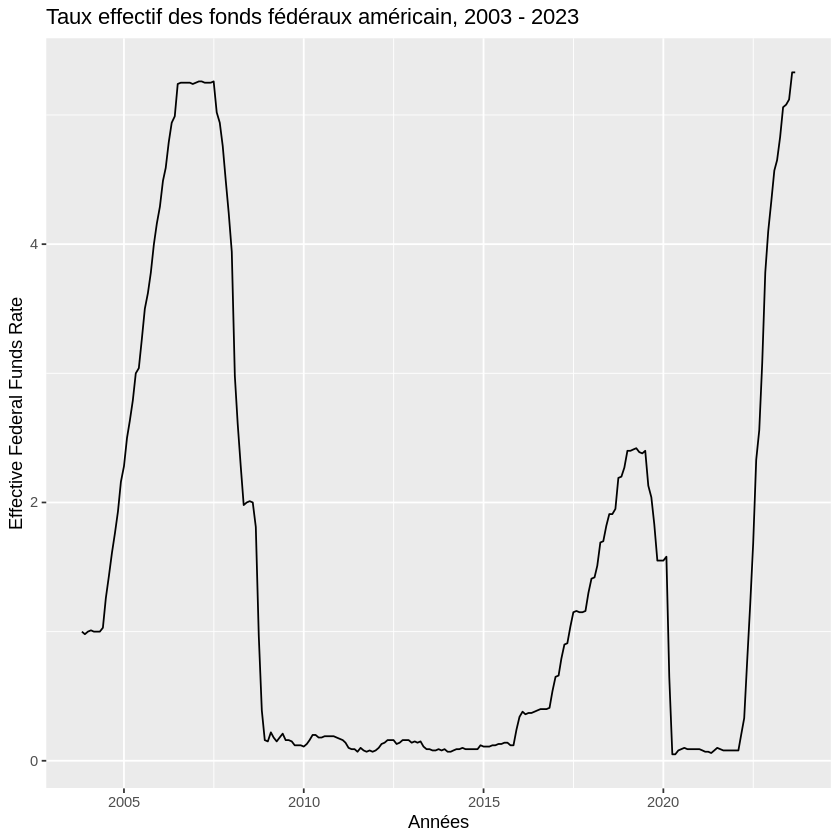

In [ ]:
library(ggplot2)
ggplot(data = FEDFUND, aes(x = date, y = DataFF)) +
  geom_line() +
  labs(x = "Années", y = "Effective Federal Funds Rate") +
  ggtitle("Taux effectif des fonds fédéraux américain, 2003 - 2023")

, , 1

           [,1]
 [1,] 1.0000000
 [2,] 0.9968353
 [3,] 0.9939061
 [4,] 0.9910589
 [5,] 0.9882135
 [6,] 0.9853064
 [7,] 0.9824711
 [8,] 0.9796188
 [9,] 0.9768202
[10,] 0.9739770
[11,] 0.9711086

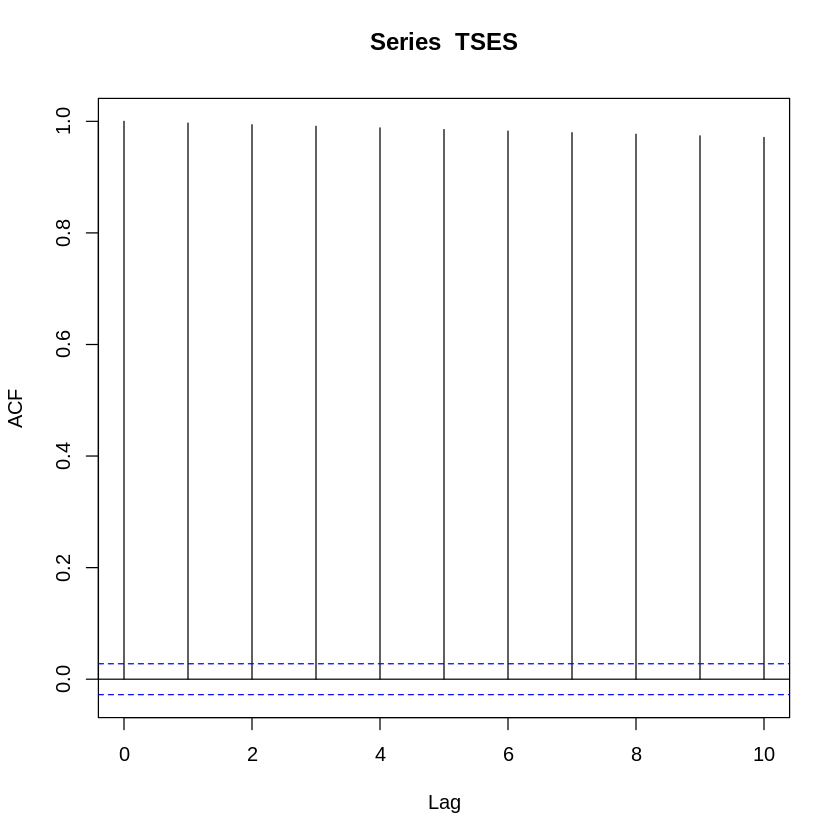

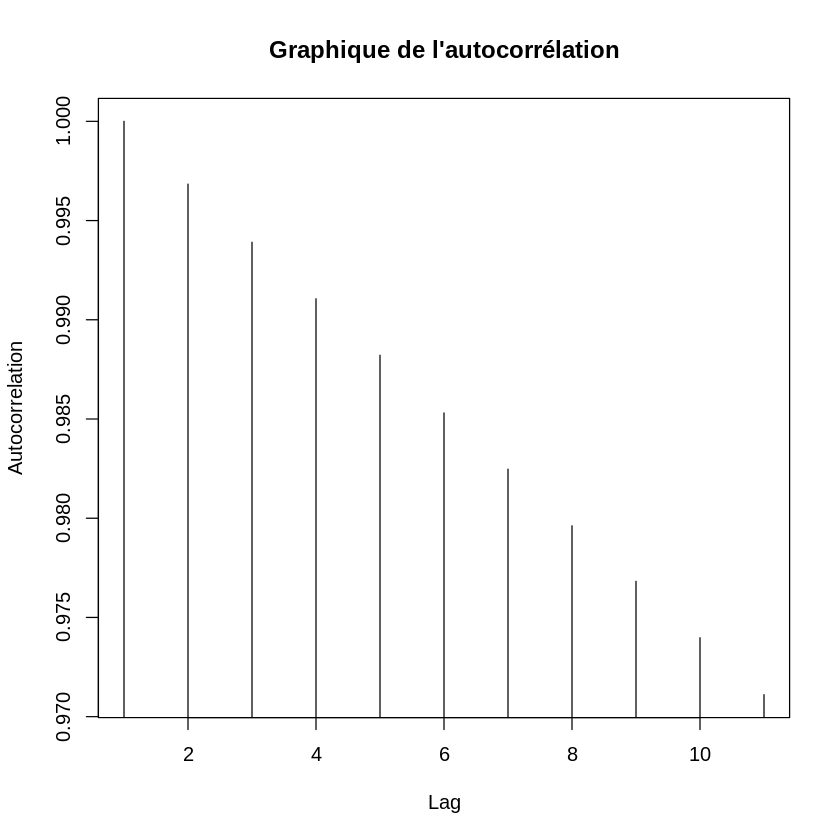

In [ ]:
TSES <- ts(EnergySector$DataES)

autocorrelation <-acf(TSES, lag.max = 10)
autocorrelation$acf
plot(autocorrelation$acf, type = "h", xlab = "Lag", ylab = "Autocorrelation", main = "Graphique de l'autocorrélation")

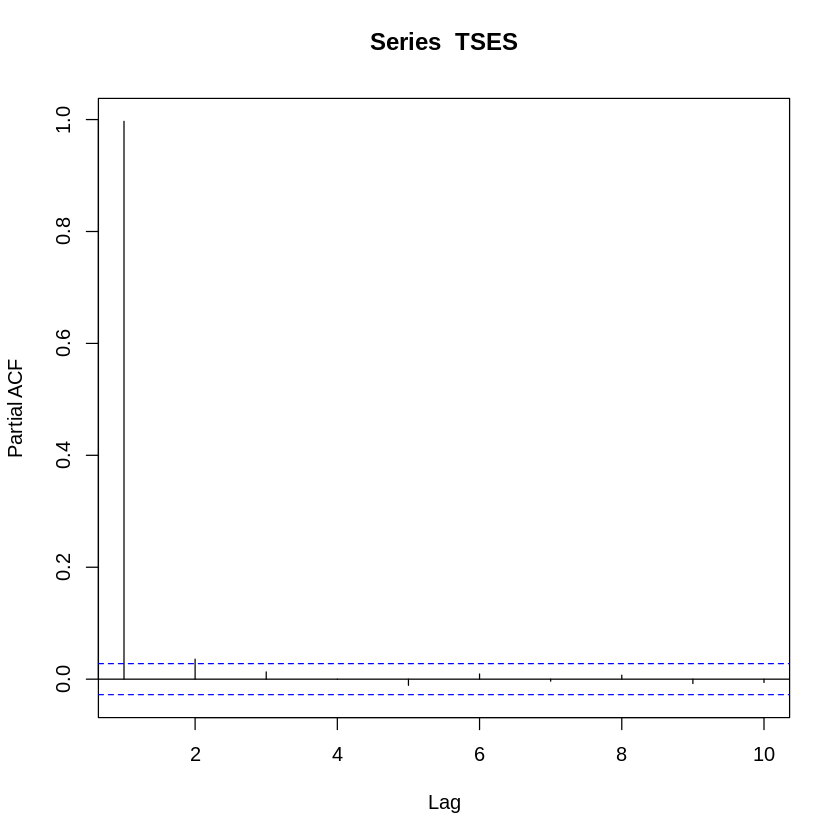

In [ ]:
pacf(TSES, lag.max=10)

, , 1

           [,1]
 [1,] 1.0000000
 [2,] 0.9839455
 [3,] 0.9606697
 [4,] 0.9332699
 [5,] 0.9011664
 [6,] 0.8651716
 [7,] 0.8262185
 [8,] 0.7840364
 [9,] 0.7387403
[10,] 0.6913163
[11,] 0.6421719

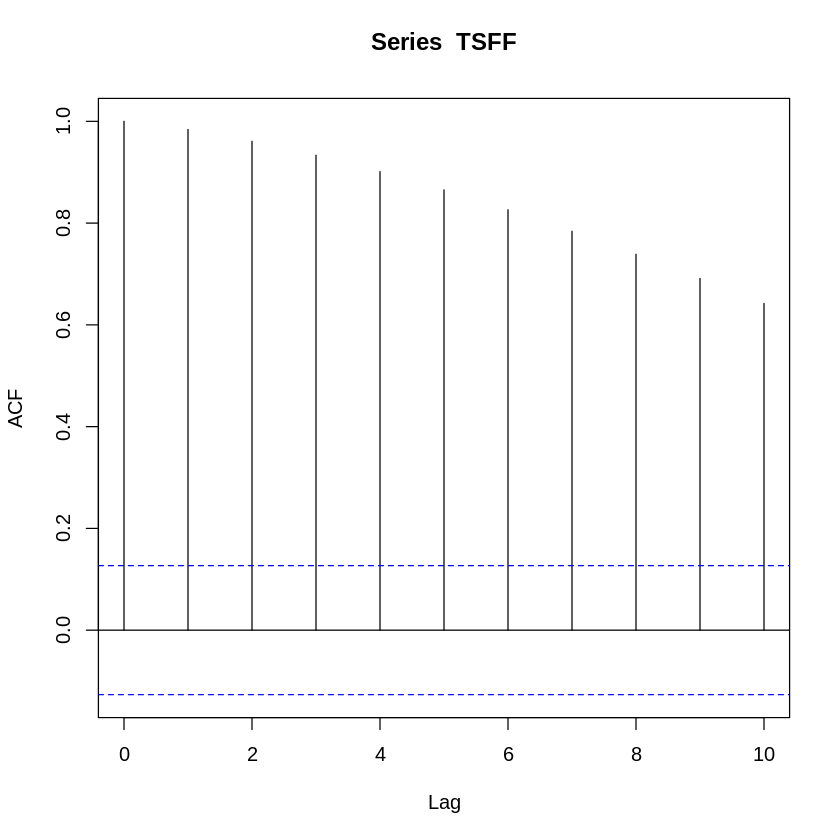

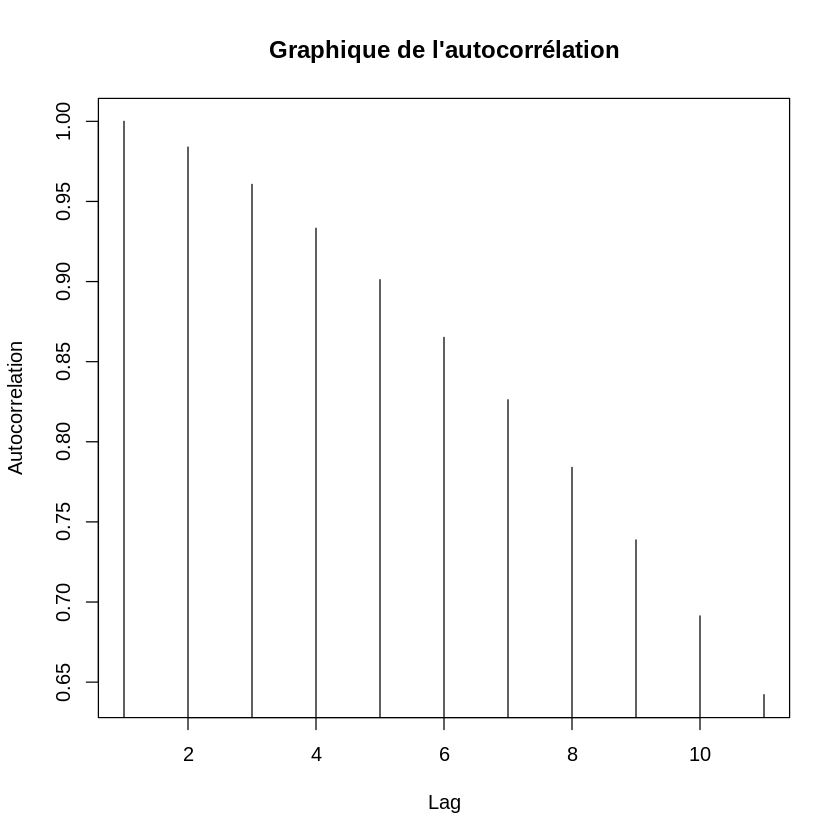

In [ ]:
TSFF <- ts(FEDFUND$DataFF)

autocorrelation <-acf(TSFF, lag.max = 10)

autocorrelation$acf
plot(autocorrelation$acf, type = "h", xlab = "Lag", ylab = "Autocorrelation", main = "Graphique de l'autocorrélation")


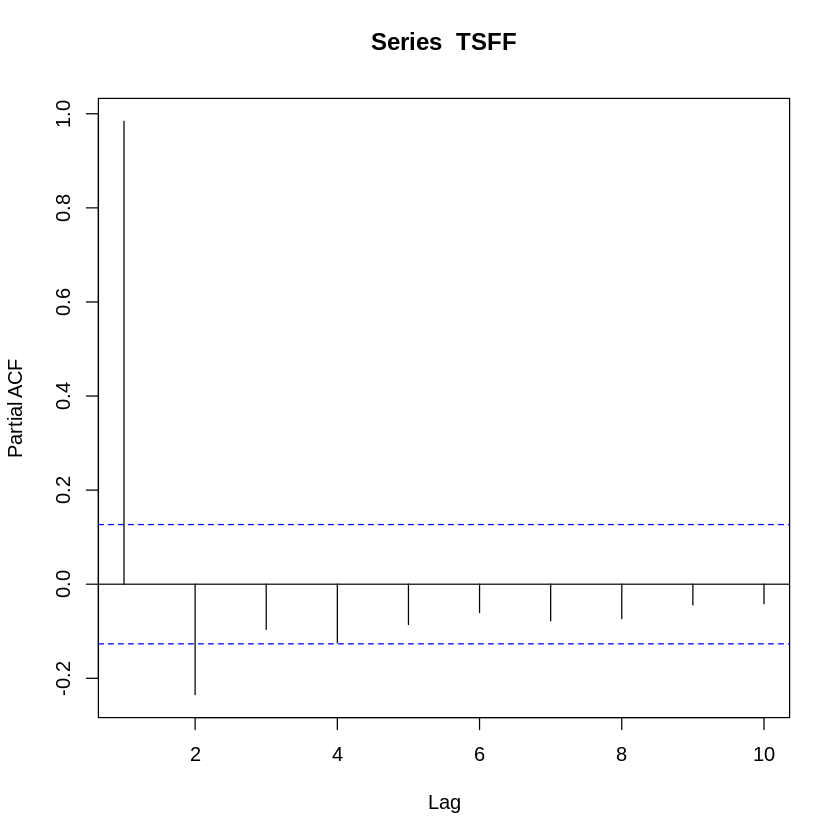

In [ ]:
pacf(TSFF, lag.max=10)

In [ ]:
library(tseries)
adf.test(TSES, alternative = "explosive")


	Augmented Dickey-Fuller Test

data:  TSES
Dickey-Fuller = -2.7375, Lag order = 17, p-value = 0.734
alternative hypothesis: explosive


In [ ]:
adf.test(TSES, alternative = "stationary")


	Augmented Dickey-Fuller Test

data:  TSES
Dickey-Fuller = -2.7375, Lag order = 17, p-value = 0.266
alternative hypothesis: stationary


In [ ]:
adf.test(TSFF, alternative = "explosive")


	Augmented Dickey-Fuller Test

data:  TSFF
Dickey-Fuller = -2.5336, Lag order = 6, p-value = 0.6485
alternative hypothesis: explosive


In [ ]:
adf.test(TSFF, alternative = "stationary")


	Augmented Dickey-Fuller Test

data:  TSFF
Dickey-Fuller = -2.5336, Lag order = 6, p-value = 0.3515
alternative hypothesis: stationary
